# PyTorch scaling benchmark analysis

Throughput scaling of PyTorch benchmarks on Cori Haswell with PyTorch distributed and Cray MPI.

In [1]:
import os
import re
import glob

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results data

In [8]:
versions = ['v1.1.0', 'v1.2.0', 'v1.2.0.ddp.test']

In [12]:
results_files = []
for version in versions:
    results_files += glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-%s-n*/results.txt' % version)

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n32/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n16/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n4/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n8/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n2/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n32/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n64/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n4/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n8/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n16/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchma

In [13]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,model
0,351.620846,949.831145,32,hsw,v1.1.0,inceptionV3
1,9655.755195,24522.430880,32,hsw,v1.1.0,lstm
2,3400.655893,23009.329886,32,hsw,v1.1.0,alexnet
3,388.868050,721.859278,32,hsw,v1.1.0,resnet50
4,524.148369,1862.533880,32,hsw,v1.1.0,vgg11
5,5680.345040,13308.165343,32,hsw,v1.1.0,cnn3d
6,176.147509,457.151361,16,hsw,v1.1.0,inceptionV3
7,4959.168386,12210.325726,16,hsw,v1.1.0,lstm
8,1747.635305,11454.894958,16,hsw,v1.1.0,alexnet
9,199.680817,362.267349,16,hsw,v1.1.0,resnet50


In [33]:
results[results.version=='v1.2.0.ddp.test'].sort_values('model')

,train_rate,inference_rate,ranks,hardware,version,model
92,165.107785,815.006963,1,hsw,v1.2.0.ddp.test,alexnet
104,1766.802349,10710.651037,16,hsw,v1.2.0.ddp.test,alexnet
80,3307.781461,21098.761712,32,hsw,v1.2.0.ddp.test,alexnet
98,4444.726234,43146.747396,64,hsw,v1.2.0.ddp.test,alexnet
86,946.227296,5434.073412,8,hsw,v1.2.0.ddp.test,alexnet
101,10781.852150,26213.402294,64,hsw,v1.2.0.ddp.test,cnn3d
95,200.946745,859.508821,1,hsw,v1.2.0.ddp.test,cnn3d
89,1451.546282,3286.323094,8,hsw,v1.2.0.ddp.test,cnn3d
107,2811.540243,6484.923683,16,hsw,v1.2.0.ddp.test,cnn3d
83,5640.805802,12764.193012,32,hsw,v1.2.0.ddp.test,cnn3d


## Training throughput scaling

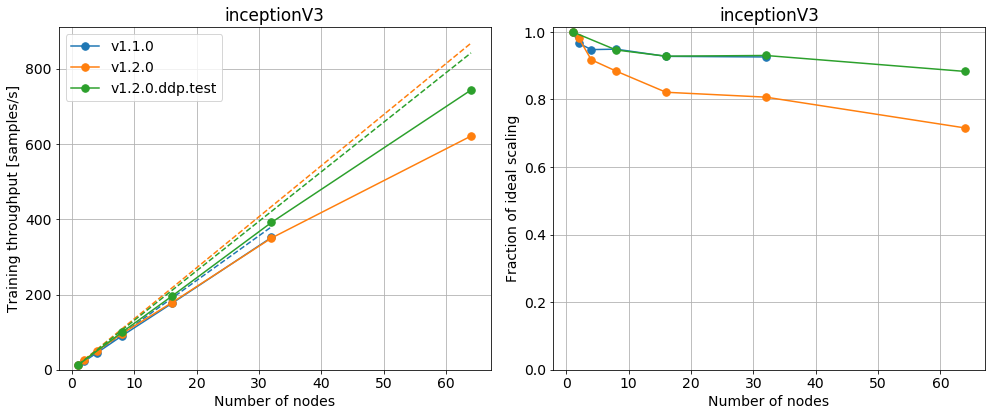

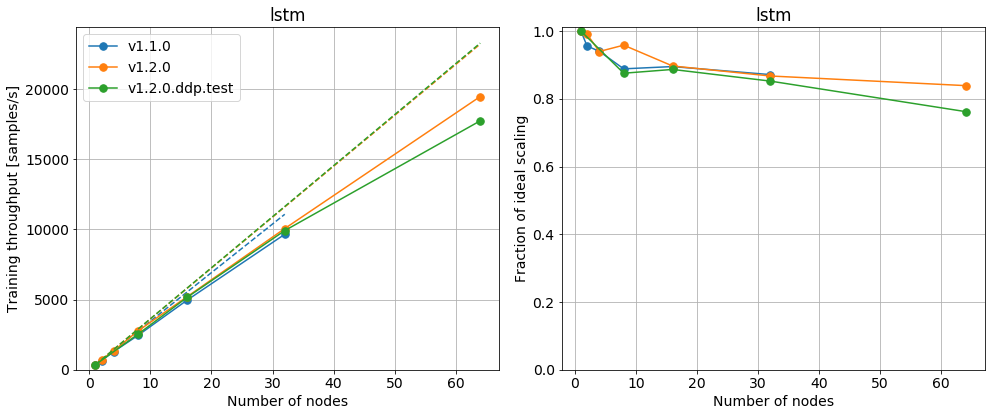

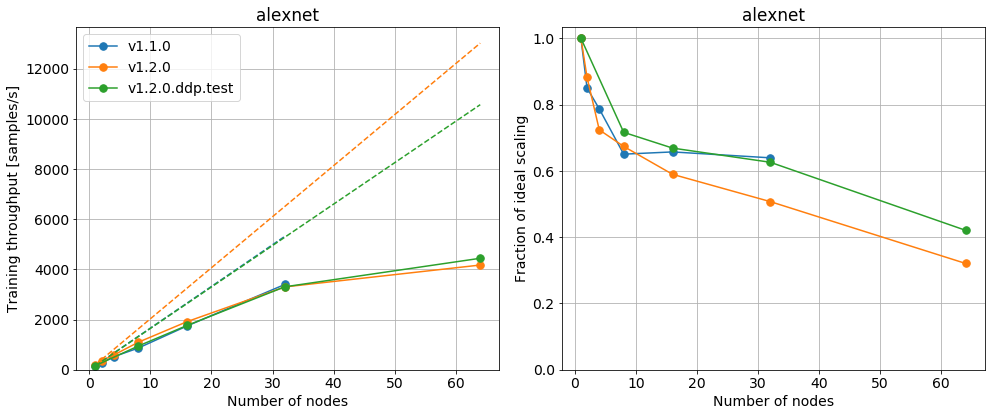

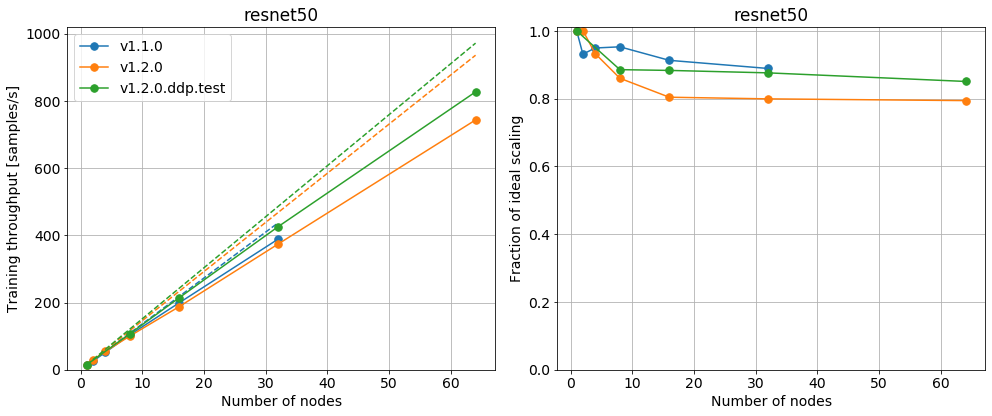

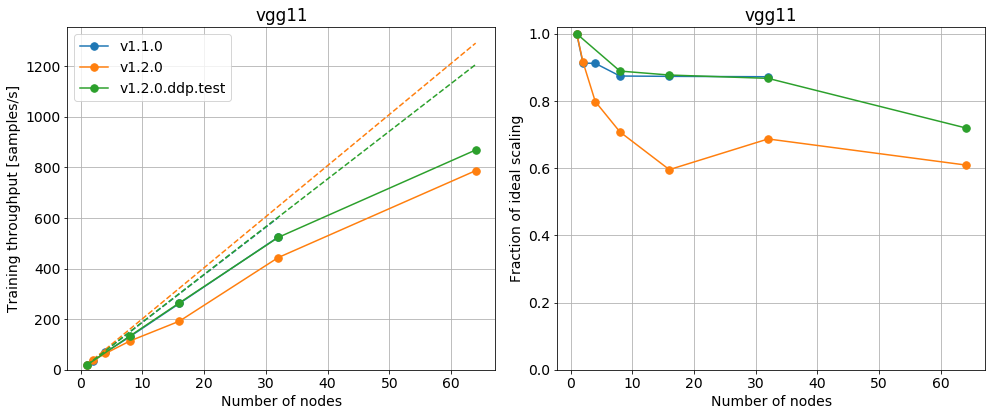

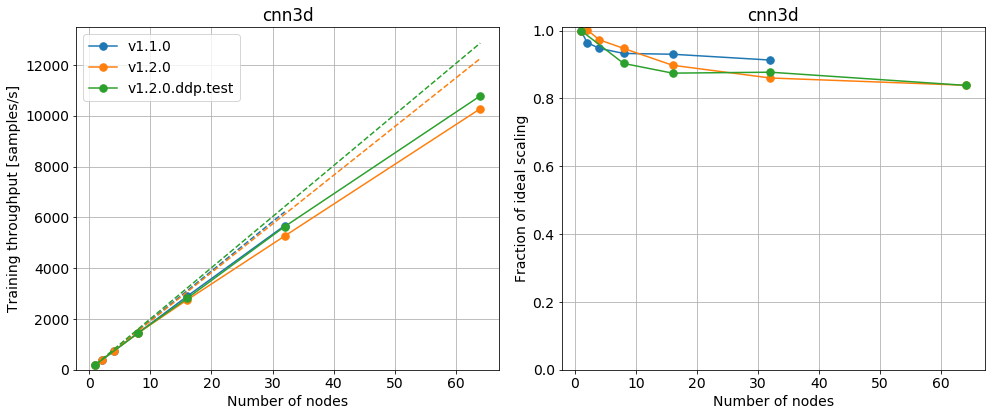

In [40]:
for model in results.model.unique():
    model_results = results[results.model == model]

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    for version in versions:
        version_results = model_results[model_results.version == version].sort_values('ranks')
        ranks, rates = version_results.ranks.values, version_results.train_rate.values
        ideal_rates = ranks * rates[0] / ranks[0]

        # Plot throughput scaling
        color = ax0.plot(ranks, rates, '.-', ms=15, label=version)[0].get_color()
        ax0.plot(ranks, ideal_rates, '--', color=color)

        # Plot the fraction of ideal scaling
        ax1.plot(ranks, rates / ideal_rates, '.-', ms=15, color=color)

    ax0.set_xlabel('Number of nodes')
    ax0.set_ylabel('Training throughput [samples/s]')
    ax0.set_ylim(bottom=0)
    ax0.grid()
    ax0.legend(loc=0)

    ax1.set_xlabel('Number of nodes')
    ax1.set_ylabel('Fraction of ideal scaling')
    ax1.grid()
    ax1.set_ylim(bottom=0)
    ax0.set_title(model)
    ax1.set_title(model)
    plt.tight_layout()